In [98]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2023-07-06 17:23:55.514650: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13839746693247328260
 xla_global_id: -1]

# Dataset

In [44]:
import pandas as pd

In [45]:
df = pd.read_csv('penguins.csv',index_col=0)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [46]:
# Shape of data
df.shape

(344, 8)

In [47]:
# 결측치 확인
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [48]:
# 결측치 제거
df = df.dropna().reset_index(drop=True)

In [49]:
# 결측치 확인
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

연도 변수는 독립 변수에서 제외

In [50]:
df = df.iloc[:,:-1]
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [51]:
df.shape

(333, 7)

In [52]:
# Convert categorical variable into dummy

island_dummies = pd.get_dummies(df.island)
sex_dummies = pd.get_dummies(df.sex)

In [53]:
island_dummies.head()

,Biscoe,Dream,Torgersen
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True


## Concatenate dataframe

In [54]:
df = pd.concat([df,island_dummies,sex_dummies],axis=1)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen,female,male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,False,False,True,False,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,False,False,True,True,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,False,False,True,True,False
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,False,False,True,True,False
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,False,False,True,False,True


In [55]:
df = df.drop(['island','sex'],axis=1)
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Biscoe,Dream,Torgersen,female,male
0,Adelie,39.1,18.7,181.0,3750.0,False,False,True,False,True
1,Adelie,39.5,17.4,186.0,3800.0,False,False,True,True,False
2,Adelie,40.3,18.0,195.0,3250.0,False,False,True,True,False
3,Adelie,36.7,19.3,193.0,3450.0,False,False,True,True,False
4,Adelie,39.3,20.6,190.0,3650.0,False,False,True,False,True


In [56]:
df.shape

(333, 10)

## Labels

In [57]:
df.species.value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [58]:
# 문자열 형태를 정수형으로 변환
def make_int(s):
  if s == 'Adelie':
    return 0
  elif s == 'Gentoo':
    return 1
  else:
    return 2

In [59]:
df['species'] = df.species.apply(make_int)

In [60]:
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Biscoe,Dream,Torgersen,female,male
0,0,39.1,18.7,181.0,3750.0,False,False,True,False,True
1,0,39.5,17.4,186.0,3800.0,False,False,True,True,False
2,0,40.3,18.0,195.0,3250.0,False,False,True,True,False
3,0,36.7,19.3,193.0,3450.0,False,False,True,True,False
4,0,39.3,20.6,190.0,3650.0,False,False,True,False,True


나중에 one-hot encoding을 위해서는 정수형으로 바꿔주어야 함

# Holdout

In [61]:
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf

In [62]:
np.set_printoptions(suppress=True)

In [63]:
x = df.iloc[:,1:].values
y = df.iloc[:,0]

In [64]:
x[0]

array([39.1, 18.7, 181.0, 3750.0, False, False, True, False, True],
      dtype=object)

In [65]:
y[0]

0

In [66]:
# One-hot encoding
y_one_hot = tf.keras.utils.to_categorical(y)

In [67]:
y_one_hot[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y_one_hot,test_size=0.1,shuffle=True)

In [69]:
print('Shape of x train : ',x_train.shape)
print('Shape of x test : ',x_test.shape)
print('Shape of y train : ',y_train.shape)
print('Shape of y test : ',y_test.shape)

Shape of x train :  (299, 9)
Shape of x test :  (34, 9)
Shape of y train :  (299, 3)
Shape of y test :  (34, 3)


## Scaling

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

In [72]:
x_train[:,:-5]

array([[40.5, 17.9, 187.0, 3200.0],
       [46.4, 18.6, 190.0, 3450.0],
       [43.3, 13.4, 209.0, 4400.0],
       ...,
       [38.9, 18.8, 190.0, 3600.0],
       [32.1, 15.5, 188.0, 3050.0],
       [36.0, 18.5, 186.0, 3100.0]], dtype=object)

In [73]:
scaler.fit(x_train[:,:-5])

StandardScaler()

In [74]:
x_train_std = scaler.transform(x_train[:,:-5])
x_test_std = scaler.transform(x_test[:,:-5])

In [75]:
x_train_std[0]

array([-0.63841499,  0.3575716 , -0.98716162, -1.26008654])

In [76]:
x_train_std = np.concatenate([x_train_std,x_train[:,-5:]],axis=1)
x_test_std = np.concatenate([x_test_std,x_test[:,-5:]],axis=1)

In [77]:
x_train_std[0]

array([-0.6384149870894604, 0.357571598027401, -0.9871616165082044,
       -1.260086536421747, True, False, False, True, False], dtype=object)

In [78]:
x_test_std[0]

array([1.1757465899847266, 1.2173333921491076, 0.00260090485786547,
       -0.21016933871143753, False, True, False, False, True],
      dtype=object)

# Model

- 첫 번째 은닉층의 node 수는 256
- 두 번째 은닉층의 node 수는 128
- 두 번째 은닉층 이후에 Dropout 적용
- 모든 활성화 함수는 ReLU(분류 층 제외)

## Sequential

In [81]:
# 모형 설계
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(9,))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(3,activation='softmax'))

In [82]:
# 모형 구조 보기
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               2560      
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 35843 (140.01 KB)
Trainable params: 35843 (140.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [84]:
# 학습
history = model.fit(x_train_std,y_train,epochs=100,batch_size=32,validation_split=0.1)

Epoch 1/100


9/9 [==============================] - 1s 22ms/step - loss: 0.7740 - accuracy: 0.8141 - val_loss: 0.4538 - val_accuracy: 1.0000
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3281 - accuracy: 0.9703 - val_loss: 0.1705 - val_accuracy: 1.0000
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1388 - accuracy: 0.9888 - val_loss: 0.0707 - val_accuracy: 1.0000
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0608 - accuracy: 0.9963 - val_loss: 0.0335 - val_accuracy: 1.0000
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.9963 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0271 - accuracy: 0.9926 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0178 - accuracy: 0.9926 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 8/100
9/9 [=====================

### 시각화

In [85]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


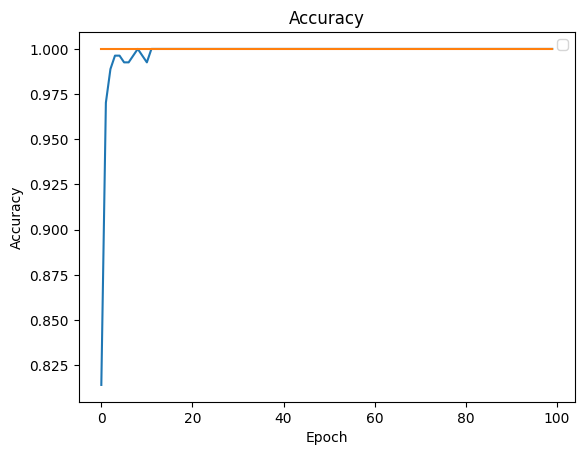

In [86]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


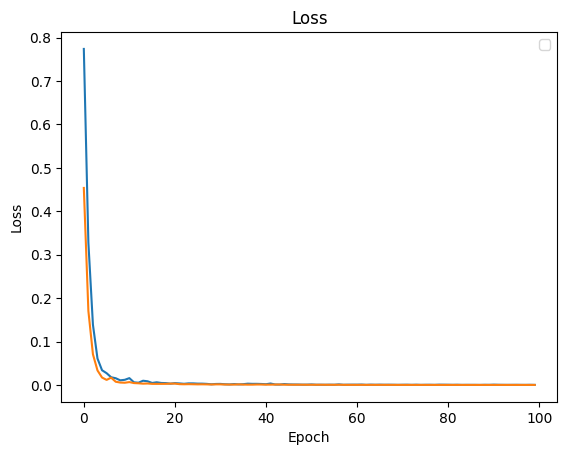

In [87]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.show()

### 평가

In [88]:
score = model.evaluate(x_test_std,y_test,verbose=0)

In [89]:
score

[0.05582830309867859, 0.970588207244873]

첫 번째가 손실, 두 번째가 정확도

In [90]:
print('Loss of model : ',np.round(score[0],4))
print(f'Accuracy of model : {score[1]*100}%')

Loss of model :  0.0558
Accuracy of model : 97.0588207244873%


### 추론

In [91]:
y_test[0]

array([0., 0., 1.], dtype=float32)

In [92]:
model.predict(x_test_std[0].reshape(1,-1),verbose=0)

array([[0.00000889, 0.00000413, 0.999987  ]], dtype=float32)

## Funtional

Skip connection 등과 같이 층들과의 또 다른 관계식을 표현할 때는 단순히 연속적으로 층을 쌓아서는 할 수 없음. 이러한 부분을 해결하기 위해서는 기능적으로 층을 쌓아야함

In [93]:
inputs = tf.keras.layers.Input(9,)
h1 = tf.keras.layers.Dense(256,activation='relu',name='Relu_layer')(inputs)
h2 = tf.keras.layers.Dense(256,activation='linear',name='Linear_layer')(inputs)
h12 = tf.keras.layers.Concatenate()([h1,h2])
outputs = tf.keras.layers.Dense(3,activation='softmax')(h12)

model = tf.keras.models.Model(inputs,outputs)

In [94]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 9)]                  0         []                            
                                                                                                  
 Relu_layer (Dense)          (None, 256)                  2560      ['input_3[0][0]']             
                                                                                                  
 Linear_layer (Dense)        (None, 256)                  2560      ['input_3[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 512)                  0         ['Relu_layer[0][0]',          
                                                                     'Linear_layer[0][0]']    

In [95]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [181]:
loss = tf.keras.losses.CategoricalCrossentropy()
adam = tf.keras.optimizers.Adam(learning_rate = 1e-4)

In [183]:
model.compile(loss=loss,optimizer=adam,metrics=['accuracy'])

### Early stopping & Model checkpoint

In [184]:
es = tf.keras.callbacks.EarlyStopping(patience = 3, monitor = 'val_loss',mode='auto',verbose=1) # 조기 종료
mc = tf.keras.callbacks.ModelCheckpoint('./sample.h5',monitor='val_loss',mode='auto',verbose=1) # Model checkpoint

- patience : 얼마나 오랫동안 변화가 없으면 학습을 멈출 것인지를 정하는 인자

- monitor : 어떠한 지표를 참고할 것인지
- mode : monitor로 관찰하는 지표가 최저일 때를 기준으로 볼 것인지, 최고를 기준으로 볼것인지

In [185]:
history = model.fit(x_train_std,y_train,epochs=100,batch_size=32,callbacks=[es,mc],validation_split=0.1)

Epoch 1/100
1/9 [==>...........................] - ETA: 14s - loss: 1.1781 - accuracy: 0.3750
Epoch 1: saving model to ./sample.h5
9/9 [==============================] - 2s 64ms/step - loss: 1.2048 - accuracy: 0.2677 - val_loss: 1.0961 - val_accuracy: 0.2667
Epoch 2/100
1/9 [==>...........................] - ETA: 0s - loss: 1.1013 - accuracy: 0.3750
Epoch 2: saving model to ./sample.h5
9/9 [==============================] - 0s 30ms/step - loss: 1.1070 - accuracy: 0.3383 - val_loss: 1.0129 - val_accuracy: 0.4333
Epoch 3/100
1/9 [==>...........................] - ETA: 0s - loss: 1.0505 - accuracy: 0.3750
Epoch 3: saving model to ./sample.h5
9/9 [==============================] - 0s 20ms/step - loss: 1.0183 - accuracy: 0.5019 - val_loss: 0.9355 - val_accuracy: 0.6333
Epoch 4/100
1/9 [==>...........................] - ETA: 0s - loss: 1.0053 - accuracy: 0.5312
Epoch 4: saving model to ./sample.h5
9/9 [==============================] - 0s 18ms/step - loss: 0.9364 - accuracy: 0.6097 - val_los

In [187]:
# 저장한 모형 불러오기
model.load_weights('./sample.h5')

In [188]:
model.evaluate(x_test_std,y_test)

2/2 [==============================] - 0s 20ms/step - loss: 0.0685 - accuracy: 1.0000


[0.06848138570785522, 1.0]

## 객체

In [190]:
# Tensorflow dataset
train_ds = tf.data.Dataset.from_tensor_slices((x_train_std,y_train)).shuffle(100).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test_std,y_test)).batch(32)

In [191]:
class SampleModel(tf.keras.Model):

  def __init__(self):
    super(SampleModel,self).__init__()
    self.d1 = tf.keras.layers.Dense(256,input_dim=9,activation='relu')
    self.d2 = tf.keras.layers.Dense(128,activation='relu')
    self.outputs = tf.keras.layers.Dense(3,activation='softmax')

  def call(self, x):
    x = self.d1(x)
    x = self.d2(x)
    output = self.outputs(x)
    return output

In [192]:
model = SampleModel()

In [194]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [195]:
model.fit(train_ds,epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 3ms/step - loss: 0.7655 - acc: 0.8194
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3052 - acc: 0.9866
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1110 - acc: 0.9900
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0431 - acc: 0.9967
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0224 - acc: 0.9967
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0151 - acc: 0.9933
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0120 - acc: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0098 - acc: 0.9967
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0089 - acc: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0077 - acc: 1.0000


In [196]:
model.evaluate(test_ds)

2/2 [==============================] - 0s 10ms/step - loss: 0.0203 - acc: 1.0000


[0.020255427807569504, 1.0]

### Gradient Tape

In [197]:
loss_object = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [198]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

In [199]:
@tf.function
def train_step(model,inputs,labels,loss_object,optimizer,train_loss,train_metric):
  with tf.GradientTape() as tape:
    preds = model(inputs)
    loss = loss_object(labels,preds)
  gradients = tape.gradient(loss, model.trainable_variables)

  optimizer.apply_gradients(zip(gradients,model.trainable_variables))
  train_loss(loss)
  train_metric(labels,preds)


In [200]:
for epoch in range(10):
  for x, label in train_ds:
    train_step(model,x,label,loss_object,optimizer,train_loss,train_accuracy)

  print('Epoch : {} Loss : {} Accuracy : {}'.format(epoch,train_loss.result(),train_accuracy.result()*100))

Epoch : 0 Loss : 0.011812306940555573 Accuracy : 99.33110809326172
Epoch : 1 Loss : 0.007976454682648182 Accuracy : 99.6655502319336
Epoch : 2 Loss : 0.008113743737339973 Accuracy : 99.6655502319336
Epoch : 3 Loss : 0.006807760801166296 Accuracy : 99.7491683959961
Epoch : 4 Loss : 0.006038080435246229 Accuracy : 99.79933166503906
Epoch : 5 Loss : 0.005408630706369877 Accuracy : 99.83277130126953
Epoch : 6 Loss : 0.004990162327885628 Accuracy : 99.85665893554688
Epoch : 7 Loss : 0.004604077897965908 Accuracy : 99.87458038330078
Epoch : 8 Loss : 0.004298255778849125 Accuracy : 99.88851928710938
Epoch : 9 Loss : 0.004038689658045769 Accuracy : 99.89966583251953
